# Mental Health in Tech Survey
https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [2]:
import pandas as pd
from IPython.display import display
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [3]:
df_data = pd.read_csv("../1_data/survey.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [4]:
# coutn missing
pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

,num of missing
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [5]:
# 文字列の置き換え
df_data["Gender"].replace("All", "all", inplace=True)

In [6]:
# corss tab
for col in df_data.columns:
    if col in ["Timestamp","treatment"]:
        continue
    print(col)
    df_c = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
    display(df_c)

Age


Age,-1726,-29,-1,5,8,11,18,19,20,21,...,57,58,60,61,62,65,72,329,99999999999,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,1,0,1,0,1,4,5,4,8,...,1,0,1,0,1,1,0,0,0,622
Yes,1,0,1,0,1,0,3,4,2,8,...,2,1,1,1,0,0,1,1,1,637
All,1,1,1,1,1,1,7,9,6,16,...,3,1,2,1,1,1,1,1,1,1259


Gender


Gender,A little about you,Agender,Androgyne,Cis Female,Cis Male,Cis Man,Enby,F,Femake,Female,...,male leaning androgynous,msle,non-binary,"ostensibly male, unsure what that really means",p,queer,queer/she/they,something kinda male?,woman,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,0,0,0,0,0,0,12,1,37,...,1,1,0,0,0,0,0,1,0,622
Yes,1,1,1,1,2,1,1,26,0,84,...,0,0,1,1,1,1,1,0,1,637
All,1,1,1,1,2,1,1,38,1,121,...,1,1,1,1,1,1,1,1,1,1259


Country


Country,Australia,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,China,Colombia,...,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,8,3,0,5,1,4,2,35,1,2,...,2,1,5,4,1,92,341,1,0,622
Yes,13,0,1,1,0,2,2,37,0,0,...,4,0,2,3,0,93,410,0,1,637
All,21,3,1,6,1,6,4,72,1,2,...,6,1,7,7,1,185,751,1,1,1259


state


state,AL,AZ,CA,CO,CT,DC,FL,GA,IA,ID,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,1,1,52,5,2,3,7,6,1,0,...,27,19,4,8,3,29,3,1,1,337
Yes,7,6,86,4,2,1,8,6,3,1,...,18,25,7,6,0,41,9,0,1,407
All,8,7,138,9,4,4,15,12,4,1,...,45,44,11,14,3,70,12,1,2,744


self_employed


self_employed,No,Yes,All
treatment,,,
No,545,68,613
Yes,550,78,628
All,1095,146,1241


family_history


family_history,No,Yes,All
treatment,,,
No,495,127,622
Yes,272,365,637
All,767,492,1259


work_interfere


work_interfere,Never,Often,Rarely,Sometimes,All
treatment,,,,,
No,183,21,51,107,362
Yes,30,123,122,358,633
All,213,144,173,465,995


no_employees


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
treatment,,,,,,,
No,71,81,139,33,162,136,622
Yes,91,95,150,27,128,146,637
All,162,176,289,60,290,282,1259


remote_work


remote_work,No,Yes,All
treatment,,,
No,444,178,622
Yes,439,198,637
All,883,376,1259


tech_company


tech_company,No,Yes,All
treatment,,,
No,105,517,622
Yes,123,514,637
All,228,1031,1259


benefits


benefits,Don't know,No,Yes,All
treatment,,,,
No,257,193,172,622
Yes,151,181,305,637
All,408,374,477,1259


care_options


care_options,No,Not sure,Yes,All
treatment,,,,
No,294,191,137,622
Yes,207,123,307,637
All,501,314,444,1259


wellness_program


wellness_program,Don't know,No,Yes,All
treatment,,,,
No,107,422,93,622
Yes,81,420,136,637
All,188,842,229,1259


seek_help


seek_help,Don't know,No,Yes,All
treatment,,,,
No,197,323,102,622
Yes,166,323,148,637
All,363,646,250,1259


anonymity


anonymity,Don't know,No,Yes,All
treatment,,,,
No,448,27,147,622
Yes,371,38,228,637
All,819,65,375,1259


leave


leave,Don't know,Somewhat difficult,Somewhat easy,Very difficult,Very easy,All
treatment,,,,,,
No,309,44,135,31,103,622
Yes,254,82,131,67,103,637
All,563,126,266,98,206,1259


mental_health_consequence


mental_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,224,280,118,622
Yes,253,210,174,637
All,477,490,292,1259


phys_health_consequence


phys_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,127,470,25,622
Yes,146,455,36,637
All,273,925,61,1259


coworkers


coworkers,No,Some of them,Yes,All
treatment,,,,
No,141,384,97,622
Yes,119,390,128,637
All,260,774,225,1259


supervisor


supervisor,No,Some of them,Yes,All
treatment,,,,
No,186,170,266,622
Yes,207,180,250,637
All,393,350,516,1259


mental_health_interview


mental_health_interview,Maybe,No,Yes,All
treatment,,,,
No,125,479,18,622
Yes,82,529,26,637
All,207,1008,44,1259


phys_health_interview


phys_health_interview,Maybe,No,Yes,All
treatment,,,,
No,290,241,91,622
Yes,267,259,111,637
All,557,500,202,1259


mental_vs_physical


mental_vs_physical,Don't know,No,Yes,All
treatment,,,,
No,316,138,168,622
Yes,260,202,175,637
All,576,340,343,1259


obs_consequence


obs_consequence,No,Yes,All
treatment,,,
No,566,56,622
Yes,509,128,637
All,1075,184,1259


comments


comments,,(yes but the situation was unusual and involved a change in leadership at a very high level in the organization as well as an extended leave of absence),* Small family business - YMMV.,-,A close family member of mine struggles with mental health so I try not to stigmatize it. My employers/coworkers also seem compassionate toward any kind of health or family needs.,A co-worker recently had mental health issues and my employer was very reasonable with them I don't know the full story but I do know that he was given ample time off and eased back in to the work place.,A lot of these answers aren't really applicable since I'm self employed as a sole proprietor.,A strong mind goes a long way. Stay strong. Take some time off to help. Its all in your head.,Although my employer does everything they can to accommodate employees with mental health problems when those individuals cannot carry out any work assigned to them (even over the course of months) they appear to have no alternative but to terminate their employment. However I believe this would be the same for a physical health problem.,At a previous employer I witness a bad thing happen to a coworker with mental health issues get swept under the rug... :(,...,YOU MAY WANT TO THROW OUT MY ENTRY.I answered all of these questions with the assumption that Attention Deficit Disorder is considered a mental illness and with ADD in mind.,as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :),fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,i'm in a country with social health care so my options are not dependant on my employer. this makes a few of the early questions less relevant than they would be for a resident of the US.,it is my opinion that bad mental health is a red flag for employers and i would never bring it up.,password: testered,suffer from CR-PTSD so all answered based on that,thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me,you rock for doing this!,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,1,1,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,58
Yes,1,0,4,0,0,0,0,0,0,1,...,1,0,1,1,1,1,1,1,1,106
All,1,1,5,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,164


In [17]:
# corss tab %
for col in df_data.columns:
    if col in ["Timestamp","treatment"]:
        continue
    print(col)
    df_c = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True, normalize=True)
    display(df_c)

Age


Age,-1726,-29,-1,5,8,11,18,19,20,21,...,57,58,60,61,62,65,72,329,99999999999,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0.000000,0.000794,0.000000,0.000794,0.000000,0.000794,0.003177,0.003971,0.003177,0.006354,...,0.000794,0.000000,0.000794,0.000000,0.000794,0.000794,0.000000,0.000000,0.000000,0.494043
Yes,0.000794,0.000000,0.000794,0.000000,0.000794,0.000000,0.002383,0.003177,0.001589,0.006354,...,0.001589,0.000794,0.000794,0.000794,0.000000,0.000000,0.000794,0.000794,0.000794,0.505957
All,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.005560,0.007149,0.004766,0.012708,...,0.002383,0.000794,0.001589,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,1.000000


Gender


Gender,A little about you,Agender,Androgyne,Cis Female,Cis Male,Cis Man,Enby,F,Femake,Female,...,male leaning androgynous,msle,non-binary,"ostensibly male, unsure what that really means",p,queer,queer/she/they,something kinda male?,woman,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009531,0.000794,0.029388,...,0.000794,0.000794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000794,0.000000,0.494043
Yes,0.000794,0.000794,0.000794,0.000794,0.001589,0.000794,0.000794,0.020651,0.000000,0.066720,...,0.000000,0.000000,0.000794,0.000794,0.000794,0.000794,0.000794,0.000000,0.000794,0.505957
All,0.000794,0.000794,0.000794,0.000794,0.001589,0.000794,0.000794,0.030183,0.000794,0.096108,...,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,1.000000


Country


Country,Australia,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,China,Colombia,...,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0.006354,0.002383,0.000000,0.003971,0.000794,0.003177,0.001589,0.027800,0.000794,0.001589,...,0.001589,0.000794,0.003971,0.003177,0.000794,0.073074,0.270850,0.000794,0.000000,0.494043
Yes,0.010326,0.000000,0.000794,0.000794,0.000000,0.001589,0.001589,0.029388,0.000000,0.000000,...,0.003177,0.000000,0.001589,0.002383,0.000000,0.073868,0.325655,0.000000,0.000794,0.505957
All,0.016680,0.002383,0.000794,0.004766,0.000794,0.004766,0.003177,0.057188,0.000794,0.001589,...,0.004766,0.000794,0.005560,0.005560,0.000794,0.146942,0.596505,0.000794,0.000794,1.000000


state


state,AL,AZ,CA,CO,CT,DC,FL,GA,IA,ID,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0.001344,0.001344,0.069892,0.006720,0.002688,0.004032,0.009409,0.008065,0.001344,0.000000,...,0.036290,0.025538,0.005376,0.010753,0.004032,0.038978,0.004032,0.001344,0.001344,0.452957
Yes,0.009409,0.008065,0.115591,0.005376,0.002688,0.001344,0.010753,0.008065,0.004032,0.001344,...,0.024194,0.033602,0.009409,0.008065,0.000000,0.055108,0.012097,0.000000,0.001344,0.547043
All,0.010753,0.009409,0.185484,0.012097,0.005376,0.005376,0.020161,0.016129,0.005376,0.001344,...,0.060484,0.059140,0.014785,0.018817,0.004032,0.094086,0.016129,0.001344,0.002688,1.000000


self_employed


self_employed,No,Yes,All
treatment,,,
No,0.439162,0.054795,0.493956
Yes,0.443191,0.062853,0.506044
All,0.882353,0.117647,1.000000


family_history


family_history,No,Yes,All
treatment,,,
No,0.393169,0.100874,0.494043
Yes,0.216044,0.289913,0.505957
All,0.609214,0.390786,1.000000


work_interfere


work_interfere,Never,Often,Rarely,Sometimes,All
treatment,,,,,
No,0.183920,0.021106,0.051256,0.107538,0.363819
Yes,0.030151,0.123618,0.122613,0.359799,0.636181
All,0.214070,0.144724,0.173869,0.467337,1.000000


no_employees


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
treatment,,,,,,,
No,0.056394,0.064337,0.110405,0.026211,0.128674,0.108022,0.494043
Yes,0.072280,0.075457,0.119142,0.021446,0.101668,0.115965,0.505957
All,0.128674,0.139793,0.229547,0.047657,0.230342,0.223987,1.000000


remote_work


remote_work,No,Yes,All
treatment,,,
No,0.352661,0.141382,0.494043
Yes,0.348689,0.157268,0.505957
All,0.701350,0.298650,1.000000


tech_company


tech_company,No,Yes,All
treatment,,,
No,0.083400,0.410643,0.494043
Yes,0.097697,0.408261,0.505957
All,0.181096,0.818904,1.000000


benefits


benefits,Don't know,No,Yes,All
treatment,,,,
No,0.204130,0.153296,0.136616,0.494043
Yes,0.119936,0.143765,0.242256,0.505957
All,0.324067,0.297061,0.378872,1.000000


care_options


care_options,No,Not sure,Yes,All
treatment,,,,
No,0.233519,0.151708,0.108817,0.494043
Yes,0.164416,0.097697,0.243844,0.505957
All,0.397935,0.249404,0.352661,1.000000


wellness_program


wellness_program,Don't know,No,Yes,All
treatment,,,,
No,0.084988,0.335187,0.073868,0.494043
Yes,0.064337,0.333598,0.108022,0.505957
All,0.149325,0.668785,0.181890,1.000000


seek_help


seek_help,Don't know,No,Yes,All
treatment,,,,
No,0.156473,0.256553,0.081017,0.494043
Yes,0.131851,0.256553,0.117554,0.505957
All,0.288324,0.513106,0.198570,1.000000


anonymity


anonymity,Don't know,No,Yes,All
treatment,,,,
No,0.355838,0.021446,0.116759,0.494043
Yes,0.294678,0.030183,0.181096,0.505957
All,0.650516,0.051628,0.297855,1.000000


leave


leave,Don't know,Somewhat difficult,Somewhat easy,Very difficult,Very easy,All
treatment,,,,,,
No,0.245433,0.034948,0.107228,0.024623,0.081811,0.494043
Yes,0.201747,0.065131,0.104051,0.053217,0.081811,0.505957
All,0.447180,0.100079,0.211279,0.077840,0.163622,1.000000


mental_health_consequence


mental_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,0.177919,0.222399,0.093725,0.494043
Yes,0.200953,0.166799,0.138205,0.505957
All,0.378872,0.389198,0.231930,1.000000


phys_health_consequence


phys_health_consequence,Maybe,No,Yes,All
treatment,,,,
No,0.100874,0.373312,0.019857,0.494043
Yes,0.115965,0.361398,0.028594,0.505957
All,0.216839,0.734710,0.048451,1.000000


coworkers


coworkers,No,Some of them,Yes,All
treatment,,,,
No,0.111994,0.305004,0.077045,0.494043
Yes,0.094519,0.309770,0.101668,0.505957
All,0.206513,0.614774,0.178713,1.000000


supervisor


supervisor,No,Some of them,Yes,All
treatment,,,,
No,0.147736,0.135028,0.211279,0.494043
Yes,0.164416,0.142971,0.198570,0.505957
All,0.312153,0.277998,0.409849,1.000000


mental_health_interview


mental_health_interview,Maybe,No,Yes,All
treatment,,,,
No,0.099285,0.380461,0.014297,0.494043
Yes,0.065131,0.420175,0.020651,0.505957
All,0.164416,0.800635,0.034948,1.000000


phys_health_interview


phys_health_interview,Maybe,No,Yes,All
treatment,,,,
No,0.230342,0.191422,0.072280,0.494043
Yes,0.212073,0.205719,0.088165,0.505957
All,0.442415,0.397141,0.160445,1.000000


mental_vs_physical


mental_vs_physical,Don't know,No,Yes,All
treatment,,,,
No,0.250993,0.109611,0.133439,0.494043
Yes,0.206513,0.160445,0.138999,0.505957
All,0.457506,0.270056,0.272438,1.000000


obs_consequence


obs_consequence,No,Yes,All
treatment,,,
No,0.449563,0.044480,0.494043
Yes,0.404289,0.101668,0.505957
All,0.853852,0.146148,1.000000


comments


comments,,(yes but the situation was unusual and involved a change in leadership at a very high level in the organization as well as an extended leave of absence),* Small family business - YMMV.,-,A close family member of mine struggles with mental health so I try not to stigmatize it. My employers/coworkers also seem compassionate toward any kind of health or family needs.,A co-worker recently had mental health issues and my employer was very reasonable with them I don't know the full story but I do know that he was given ample time off and eased back in to the work place.,A lot of these answers aren't really applicable since I'm self employed as a sole proprietor.,A strong mind goes a long way. Stay strong. Take some time off to help. Its all in your head.,Although my employer does everything they can to accommodate employees with mental health problems when those individuals cannot carry out any work assigned to them (even over the course of months) they appear to have no alternative but to terminate their employment. However I believe this would be the same for a physical health problem.,At a previous employer I witness a bad thing happen to a coworker with mental health issues get swept under the rug... :(,...,YOU MAY WANT TO THROW OUT MY ENTRY.I answered all of these questions with the assumption that Attention Deficit Disorder is considered a mental illness and with ADD in mind.,as a UK-based company we don't have any medical provisions as it's all provided on the National Health Service (for now!) However if we do need to take days off for any kind of health problems everyone is understanding :),fwiw I am a co founder of this company and the would you X in an interview questions shouldn't reflect how I would treat anyone addressing their own phys/mental health issue to me in such a situation.,i'm in a country with social health care so my options are not dependant on my employer. this makes a few of the early questions less relevant than they would be for a resident of the US.,it is my opinion that bad mental health is a red flag for employers and i would never bring it up.,password: testered,suffer from CR-PTSD so all answered based on that,thanks for what you're doing. FYI these questions dont quite work for entrepreneurs where employer == cofounders / sr mgmt / me,you rock for doing this!,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0.000000,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.000000,...,0.000000,0.006098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353659
Yes,0.006098,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006098,...,0.006098,0.000000,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.646341
All,0.006098,0.006098,0.030488,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,...,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,0.006098,1.000000


/Users/ogata/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


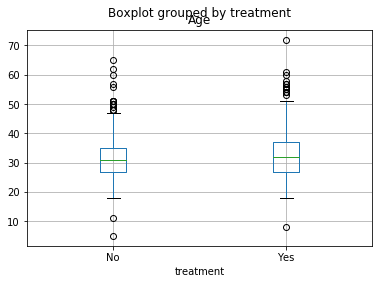

In [18]:
 # TreatmentとAgeの相関
df = df_data[(0<df_data["Age"])&(df_data["Age"]<100)]
df.boxplot(column="Age",by="treatment")
plt.show()

In [19]:
# Gender
col = "Gender"
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender.T.sort_values("All",ascending=False))

treatment,No,Yes,All
Gender,,,
All,622,637,1259
Male,330,285,615
male,112,94,206
Female,37,84,121
M,69,47,116
female,16,46,62
F,12,26,38
m,20,14,34
f,6,9,15


In [20]:
# 名寄せ
df_data["Gender2"] = df_data["Gender"].map({"Male":"Male","Female":"Female","male":"Male","female":"Female","M":"Male","F":"Female"})

In [21]:
# 再度、cross table
col = "Gender2"
df_gender = pd.crosstab(index=df_data["treatment"], columns=df_data[col], margins=True)
display(df_gender)

Gender2,Female,Male,All
treatment,,,
No,65,511,576
Yes,156,426,582
All,221,937,1158
